## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/var/folders/ds/f8dpwy517y386kvymrw8pj100000gn/T/ipykernel_98946/475168095.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')


print("Basic statistical information:")
print(data.describe())

print("\nDataset dimensionality:")
print(data.shape)

Basic statistical information:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960    

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [4]:
target_attribute = 'y'  

if data[target_attribute].dtype == 'object':

    le = LabelEncoder()
    data[target_attribute] = le.fit_transform(data[target_attribute])


print(data.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [5]:
bank_client = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]


for column in bank_client.columns:
    unique_values = bank_client[column].unique()
    print(f"Unique values for {column}: {unique_values}")


Unique values for age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Unique values for job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values for marital: ['married' 'single' 'divorced' 'unknown']
Unique values for education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values for default: ['no' 'unknown' 'yes']
Unique values for housing: ['no' 'yes' 'unknown']
Unique values for loan: ['no' 'yes' 'unknown']


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Maximum value of Age: 98
Minimum value of Age: 17
Number of NaN in variable Age: 0


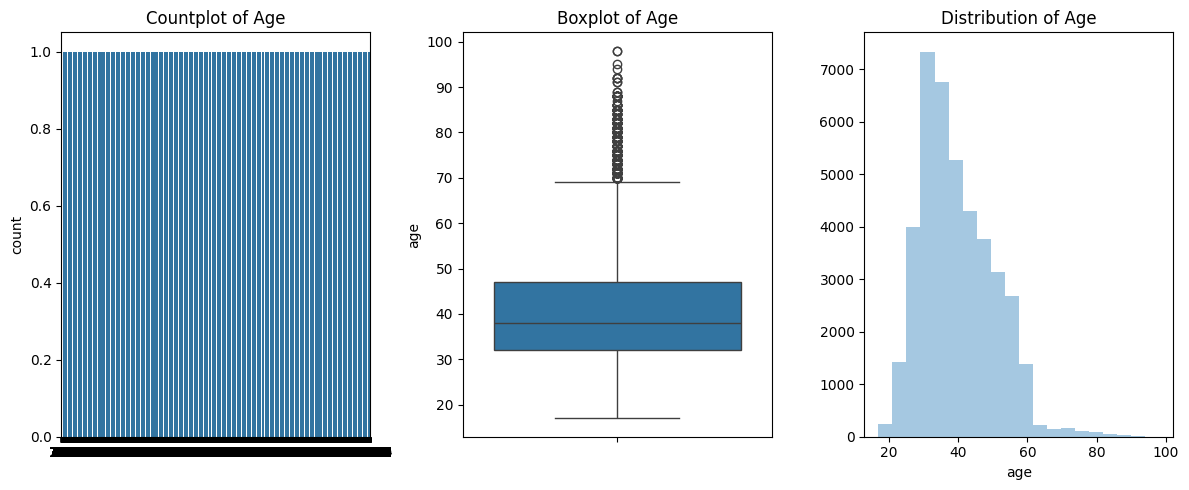

Skewness of Age distribution: 0.7846968157646645


In [6]:

print("Maximum value of Age:", data['age'].max())
print("Minimum value of Age:", data['age'].min())

nan_count = data['age'].isna().sum()
print("Number of NaN in variable Age:", nan_count)


plt.figure(figsize=(12, 5))


plt.subplot(1, 3, 1)
sns.countplot(data['age'])
plt.title('Countplot of Age')


plt.subplot(1, 3, 2)
sns.boxplot(data['age'], orient='v')
plt.title('Boxplot of Age')


plt.subplot(1, 3, 3)
sns.distplot(data['age'], kde=False, bins=20)
plt.title('Distribution of Age')

plt.tight_layout()
plt.show()


skewness = data['age'].skew()
print("Skewness of Age distribution:", skewness)


**Висновки з 1-4 завдання (детальні)**

1.Було виведено основну статистичну інформацію по числовим змінним, яка дозволяє отримати загальне уявлення про розподіл цих змінних.   
2.Було проаналізовано атрибути вибірки для визначення цільового атрибуту і ми виявили, що цільовий атрибут має категоріальний формат. 
3. Виділила всі атрибути, що характеризують клієнтів банку, у окрему частину та перевірила унікальні значення для кожного з цих атрибутів для отримання додаткового розуміння даних. 
4.Виведено максимальне та мінімальне значення атрибуту Age, що дозволяє зрозуміти діапазон віку клієнтів. Також перевірила наявність пропущених значень в атрибуті Age. Побудувала різноманітні візуалізації (countplot, boxplot, distplot) для аналізу розподілу віку клієнтів.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [7]:
import numpy as np
import pandas as pd

def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)

    return outliers




In [8]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1. Обчислені нижня та верхня межі для визначення викидів. Нижня межа обчислюється як Q1 мінус 1.5 множник IQR, а верхня межа - як Q3 плюс 1.5 множник IQR. Значення за межами цих діапазонів вважаються викидами.  
2. Дані, що виходять за межі визначених нижньої та верхньої меж представлені у вигляді окремого датафрейму, що дозволяє подальший аналіз.  


**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

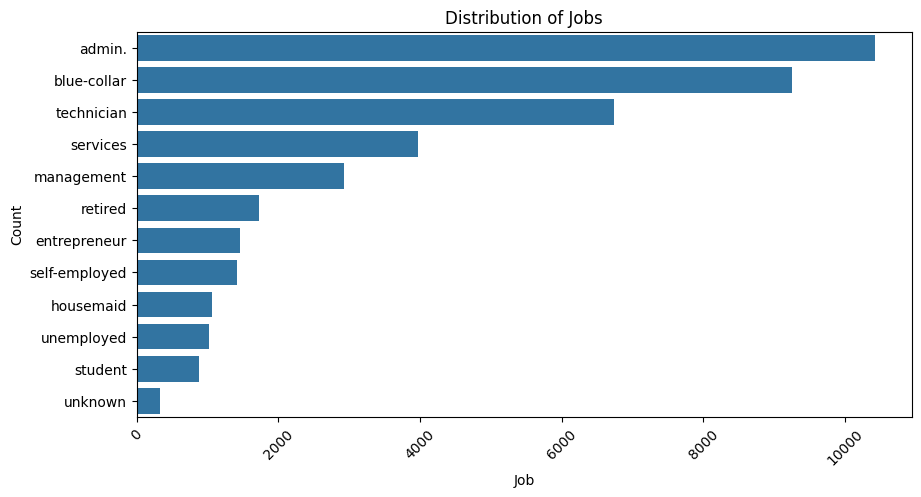

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data['job'], order=data['job'].value_counts().index)
plt.title('Distribution of Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

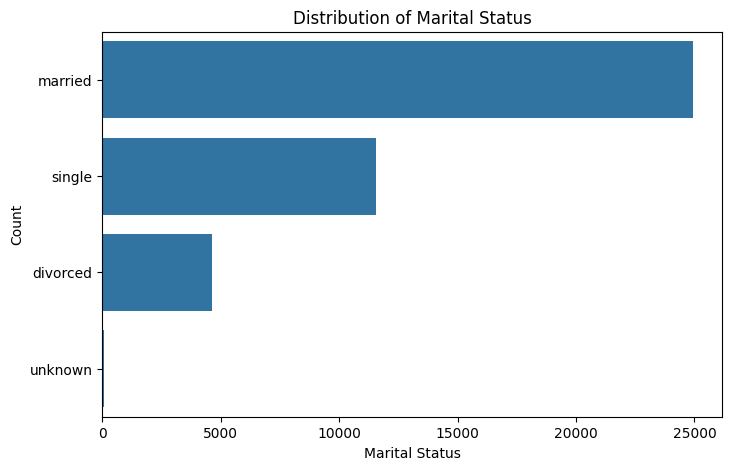

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data['marital'])
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


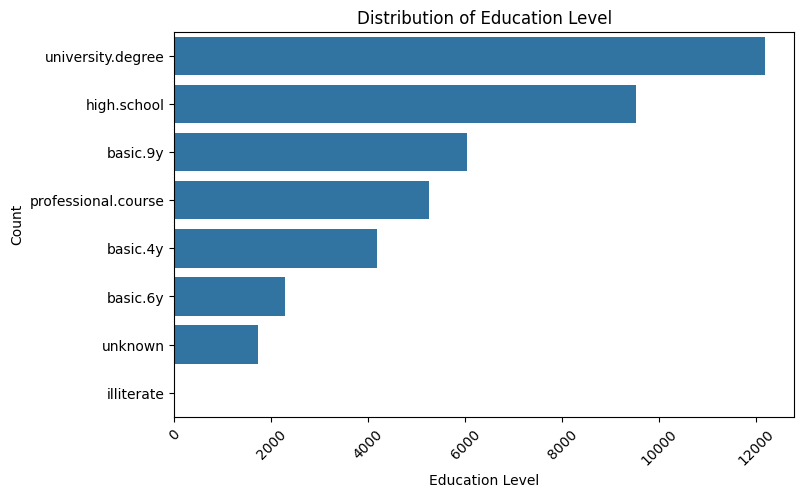

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data['education'], order=data['education'].value_counts().index)
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Висновки з завдання 6 (детальні)**

1. Графік розподілу змінної job показує розподіл різних типів робіт серед клієнтів банку. На цьому графіку ми бачимо, які професії є найпоширенішими серед клієнтів банку та визначити їхній соціальний статус.  
2. Мarital демонструє, як розподілені клієнти за сімейним статусом. На цьому графіку ми бачимо, який відсоток клієнтів є одруженими, одинокими або розведеними, що може бути корисно для сегментації аудиторії та вироблення маркетингових стратегій. 
3. Графік education показує рівень освіти клієнтів банку.
Це допомагає зрозуміти, яку частку клієнтів становлять люди з вищою освітою, середньою освітою та т. д., що може вплинути на їхні можливості та потреби у фінансових послугах.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

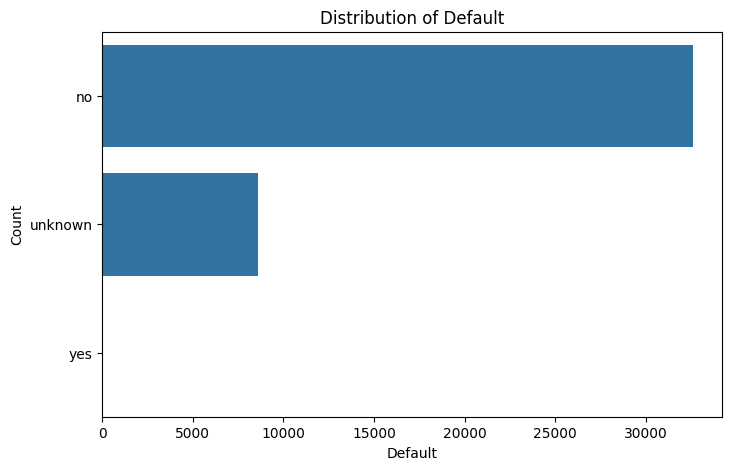

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data['default'])
plt.title('Distribution of Default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

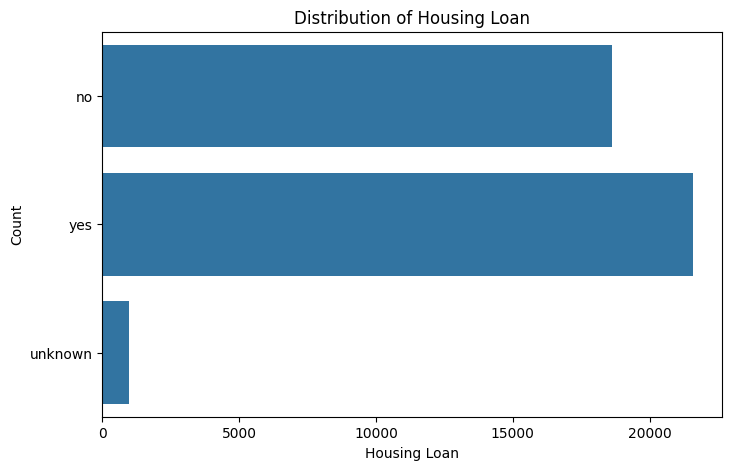

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data['housing'])
plt.title('Distribution of Housing Loan')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.show()


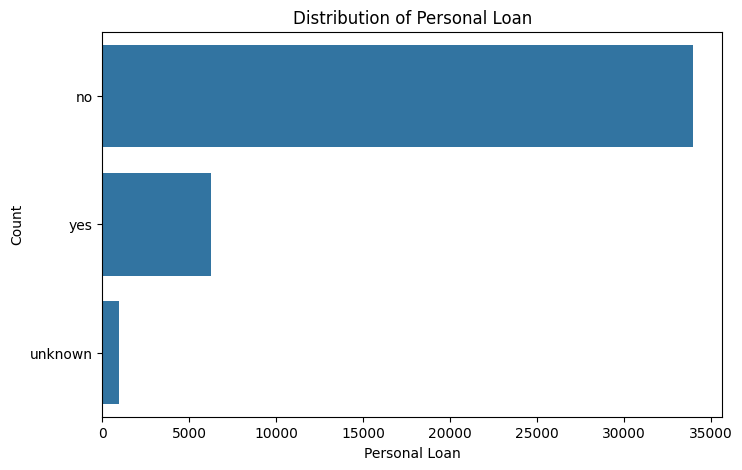

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data['loan'])
plt.title('Distribution of Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [15]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = df[col].apply(lambda x: le.fit_transform([x])[0] if pd.notnull(x) else x)
      
    return df


In [63]:

bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing', 'loan'])
print(bank_client)

       age  job  marital  education  default  housing  loan
0        3    0        0          0        0        0     0
1        3    0        0          0        0        0     0
2        1    0        0          0        0        0     0
3        2    0        0          0        0        0     0
4        3    0        0          0        0        0     0
...    ...  ...      ...        ...      ...      ...   ...
41183    3    0        0          0        0        0     0
41184    2    0        0          0        0        0     0
41185    3    0        0          0        0        0     0
41186    2    0        0          0        0        0     0
41187    3    0        0          0        0        0     0

[41188 rows x 7 columns]


**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [19]:
def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    """
    Function for encoding age column
    
    dataframe: pd.DataFrame to encode
    age_col: age col to encode 
    """
    
    Q1 = dataframe[age_col].quantile(0.25)
    Q2 = dataframe[age_col].quantile(0.5)
    Q3 = dataframe[age_col].quantile(0.75)
    
    
    dataframe.loc[dataframe[age_col] <= Q1, age_col] = 0
    dataframe.loc[(dataframe[age_col] > Q1) & (dataframe[age_col] <= Q2), age_col] = 1
    dataframe.loc[(dataframe[age_col] > Q2) & (dataframe[age_col] <= Q3), age_col] = 2
    dataframe.loc[dataframe[age_col] > Q3, age_col] = 3
    
    return dataframe

In [64]:
bank_client = encode_age(bank_client, 'age')
print(bank_client)

       age  job  marital  education  default  housing  loan
0        3    0        0          0        0        0     0
1        3    0        0          0        0        0     0
2        1    0        0          0        0        0     0
3        2    0        0          0        0        0     0
4        3    0        0          0        0        0     0
...    ...  ...      ...        ...      ...      ...   ...
41183    3    0        0          0        0        0     0
41184    2    0        0          0        0        0     0
41185    3    0        0          0        0        0     0
41186    2    0        0          0        0        0     0
41187    3    0        0          0        0        0     0

[41188 rows x 7 columns]


**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

In [23]:
count_per_quartile = bank_client['age'].value_counts().sort_index()

print("Count of values in each quartile after transformation:")
print(count_per_quartile)

Count of values in each quartile after transformation:
age
0    11176
1     9999
2    10140
3     9873
Name: count, dtype: int64


1. Змінна Age була розділена на 4 квартилі на основі її розподілу в даних.
2. Вививши кількість значень в кожному з квартилів ми отримали кількість значень Age в кожному з квартилів.

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [24]:
bank_relat_vars = ['default', 'housing', 'loan']

bank_relat = bank_client[bank_relat_vars]

print("DataFrame with variables characterizing client's relationship with the bank:")
print(bank_relat.head())

print("\nChecking for NaN values:")
print(bank_relat.isnull().sum())

DataFrame with variables characterizing client's relationship with the bank:
   default  housing  loan
0        0        0     0
1        0        0     0
2        0        0     0
3        0        0     0
4        0        0     0

Checking for NaN values:
default    0
housing    0
loan       0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [25]:
unique_contact = data['contact'].unique()
unique_month = data['month'].unique()
unique_day_of_week = data['day_of_week'].unique()



print("Unique values for 'contact':")
print(unique_contact)

print("\nUnique values for 'month':")
print(unique_month)

print("\nUnique values for 'day_of_week':")
print(unique_day_of_week)

Unique values for 'contact':
['telephone' 'cellular']

Unique values for 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Unique values for 'day_of_week':
['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



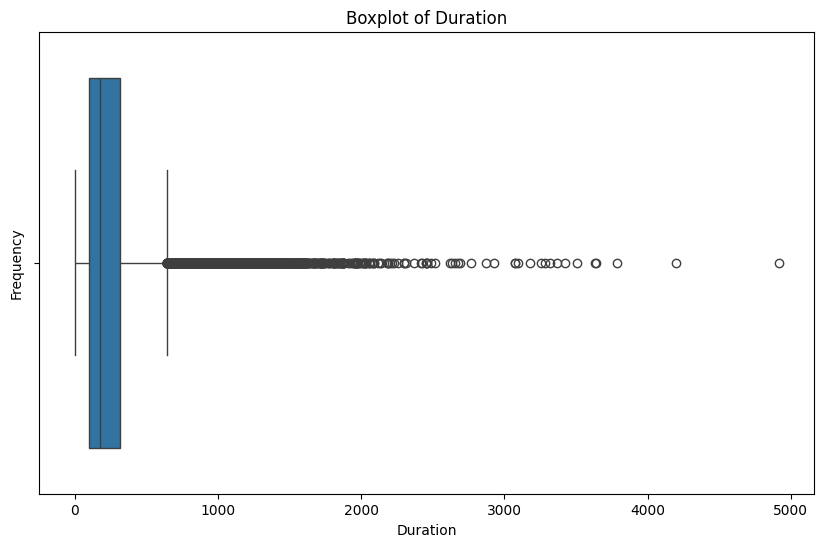

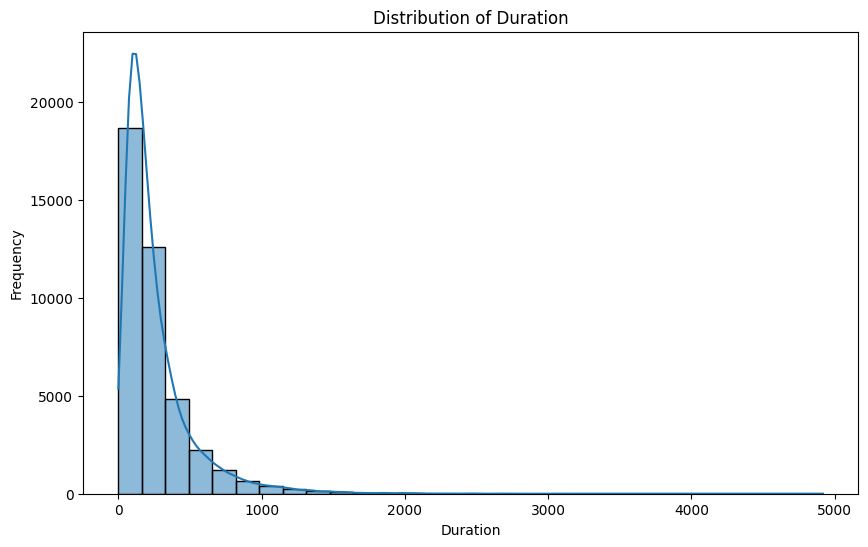

Skewness of duration distribution: 3.263141255262832


In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='duration', data=data)
plt.title('Boxplot of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data['duration'], kde=True, bins=30)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


print("Skewness of duration distribution:", data['duration'].skew())


**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [27]:
variables_to_encode = ['contact', 'month', 'day_of_week']

data = encode_categorical_columns(data, variables_to_encode)

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [65]:
import pandas as pd

def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    """
    Функція для кодування стовпця duration
    
    dataframe: pd.DataFrame для кодування
    duration_col: назва стовпця з duration
    """
    
    quartiles = dataframe[duration_col].quantile([0.25, 0.5, 0.75])

   
    dataframe['duration_encoded'] = pd.qcut(dataframe[duration_col], q=[0, 0.25, 0.5, 0.75, 1], labels=False)
    
    return dataframe

In [68]:
bank_relat = encode_duration(bank_relat, 'duration')
print(bank_relat.head())

ValueError: Bin edges must be unique: Index([0.0, 0.0, 0.0, 0.0, 0.0], dtype='float64', name='duration').
You can drop duplicate edges by setting the 'duplicates' kwarg

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [48]:
social_economic_columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
bank_socec = bank_relat[social_economic_columns].copy()


KeyError: "None of [Index(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',\n       'nr.employed'],\n      dtype='object')] are in the [columns]"

**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [49]:
other_columns = ['campaign', 'pdays', 'previous', 'poutcome']

bank_other = bank_relat[other_columns]


print(bank_other.head())

KeyError: "None of [Index(['campaign', 'pdays', 'previous', 'poutcome'], dtype='object')] are in the [columns]"

**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [51]:
le = LabelEncoder()
bank_relat['poutcome_encoded'] = le.fit_transform(bank_relat['poutcome'])

print(bank_relat[['poutcome', 'poutcome_encoded']].head())

KeyError: 'poutcome'

## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [52]:
df = pd.concat([dataset, bank_other], axis=1)

bank_final = df[['poutcome']]

NameError: name 'dataset' is not defined

**Завдання 19** Провести ділення вибірки

In [53]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [54]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, target, 0.2, 10, 101)

NameError: name 'bank_final' is not defined

In [55]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [56]:
X_train, X_test = scale_the_data(X_train, X_test)

NameError: name 'X_train' is not defined

## Логістична Регресія

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))

NameError: name 'X' is not defined

## k-NN

In [60]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

NameError: name 'X_train' is not defined

In [61]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

knnpred = knn.predict(X_test)
print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred), 2) * 100)

KNNCV = cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean()


NameError: name 'optimal_k' is not defined

## Логістична Регресія

In [62]:
models = pd.DataFrame({
                'Models': ['LogisticRegression'],
                'Score':  [LOGCV]})

models.sort_values(by='Score', ascending=False)

NameError: name 'LOGCV' is not defined

**Висновки по моделям (детальні)**

1. Логістична регресія та k-NN демонструють однакову точність на рівні 90% на тестовому наборі даних. Проте точність не завжди є найкращою метрикою, особливо коли маємо несбалансовані класи. Ця метрика може бути обмежено інформативною, оскільки не відображає ефективність моделі у визначенні менш представлених класів.
2. Для об'єктивного порівняння моделей можна розглянути інші метрики, такі як чутливість (Recall), специфічність (Specificity) або F1-оцінка. Вони дають більш повну картину ефективності моделі, особливо в умовах несбалансованих даних.
3.Також, можна врахувати використання методів збалансування класів, які допоможуть поліпшити ефективність моделі в умовах неспіввідношення кількості класів.




